In [12]:
# Imports to get and work with files
import os
import csv

# Standard DS 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Image analysis
import cv2
from PIL import Image

## Process / Workflow
1. read image and convert to grayscale
2. calculate magnitude by using vertical and horizontal Sobel edge detectors
3. add a border to the image of 15 pixels, color = white (255)
4. use Hu Moments to calculate moments which will be saved as the image vectors

In [173]:
class ShapeDescriptor:
    def describe(self, image, ksize = 17, border = True, log = True, e = 1e-7):
        
        # convert image to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # blur the image
        
        
        # find range of pixel intensity or use adaptive thresholding
        
        
        # set threshold to a value equal to a percentage of the range
        # e.g. find range and set thresh to 50% or 70%, etc. need to test different values
        
        
        
        # Threshold image
        
        
        # add a white border to the image
        
        
        # find and draw contours
        
        
        # get moments to calculate image vectors
        
        
        
        
        
        # edge detectors
        gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
        gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)

        # Calculate the magnitude and angle of 2D vectors.
        mag, _ = cv2.cartToPolar(gx, gy)
        
        # add white border to image if border = true
        if border:
            img = cv2.copyMakeBorder(
                mag, 15, 15, 15, 15,
                cv2.BORDER_CONSTANT, 
                value = 255
            )
        
        # create histogram using HuMoments
        # function calculates the 7 Hu invariants
        hist = cv2.HuMoments(cv2.moments(img)).flatten()
        hist = np.log(hist)
        hist = np.nan_to_num(hist)

        
        return hist
        
        

In [174]:
class ImageSearchUtils:
    """
    Class for utilites, helper functions, and preprocessing / cleaning functions used in the
    Image search engine project
    """
    
    def get_image_file_names(dir_path, make_a_id=False):
        """
        Go to specified directory, find all image/.png files, add them to a list and return that list of names.

        If make_a_id is True, create a_id using image file name to match id's used in other areas of the business
        e.g. change '1980.001.png' to 'a1980_001'

        ----------
        Parameters
        ----------
        dir_path: string, directory path to look through.

        return: list, list of strings of file names.
        """

        # set up empty list which will hold file names
        image_name_list = []

        # loop though directory, check to see if the file is a png and if so add to list
        for file in os.listdir(dir_path):
            # check to see if the file is a .png
            if file.endswith('png'):
                # check to see if make_a_id is True and the file name needs to be changed
                if make_a_id:
                        image_name_list.append('a'+file.replace('.', '_')[:-4])
                # if make_a_id is False get .png file name and add it to list
                else:        
                    image_name_list.append(file)

        # return list of image file names
        return image_name_list



In [175]:
# set path / directory variable to where images are
path = 'Paintings'

# get a list of image file names and a_id names
# .png file names
img_f_names = ImageSearchUtils.get_image_file_names(path)
# a_id formated names
aid_list = ImageSearchUtils.get_image_file_names(path, make_a_id=True)

In [176]:
# initalize descriptor object
shape_desc = ShapeDescriptor()

# open output file for writing
output = open('shape_image_features.csv', 'w')

# loop over both image file names and ID's
for image_path, a_id in zip(img_f_names, aid_list):
   
    # set the image ID
    image_id = a_id
    
    # read the image
    image = cv2.imread(path + '/' + image_path)
    
    # convert the iamge to grayscale and get features
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = shape_desc.describe(gray)
    
    # write ID and features to the file
    features = [str(f) for f in hist]
    output.write("%s, %s\n" % (image_id, ",".join(features)))

# close the output file
output.close()

C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


In [144]:
class SimilarityRanking:
    def __init__(self, indexPath):
        """
        Set directory path for the file of image vectors.
        
        ----------
        Parameters
        ----------
        indexPath : srting, directory path to image vectors.
        
        return    : Doesn't return anythin just sets the indexPath variable
        """
        # set the indexPath to where the image vector file is
        self.indexPath = indexPath
        
        
    def search(self, queryFeatures, metric = 'chi-squared', limit = 26):
        """
        
        """
        
        # initialize results dictionary
        results = {}
        
        # open the file to read image vectors
        with open(self.indexPath) as f:
            # initiate the CSV reader
            reader = csv.reader(f)
            
            # loop over the rows
            for row in reader:
                # parse out the image ID and feature vector, then compute
                # the distance between features in our file and the image
                # being queried
                features = [float(x) for x in row[1:]]
                
                # calculate the distance from the image and the query image
                # default chi-squared but user can choose between those below
                if metric == 'chi-squared':
                    dist = self.chi2_distance(features, queryFeatures)
                elif metric == 'euclidean':
                    pass
                elif metric == 'cosine':
                    pass
                elif metric == 'minkowski':
                    pass
                
                # once we have the distance, upadte results dictionary using
                # the image ID as the key and the distance as the value, the
                # distance represents similar of the image to the query image
                results[row[0]] = dist
                
            # close the reader
            f.close
            
        # sort the results smallest to largest
        results = sorted( [(v, k) for (k, v) in results.items()] )
        
        # return the results limited by limit parameter
        return results[1:limit]
                
    
    def chi2_distance(self, histA, histB, eps = 1e-10):
        """
        
        """
        
        # compute the chi-squared distance
        dist = 0.5 * np.sum( [ ((a - b) ** 2) / (a + b + eps) 
                              for (a, b) in zip(histA, histB) ] )
        
        # return the chi-squared distance
        return dist
        
        

In [168]:
# set an image to query
painting = 'Paintings/1974.001.png'
query = cv2.imread(painting)
query = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
features = shape_desc.describe(query)

# perform the search
searcher = SimilarityRanking('shape_image_features.csv')
results = searcher.search(features)
result_images = [x[1].replace('a','').replace('_','.') for x in results]

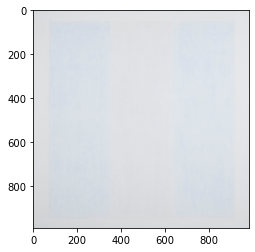

In [169]:
img = Image.open(painting)
plt.imshow(img);

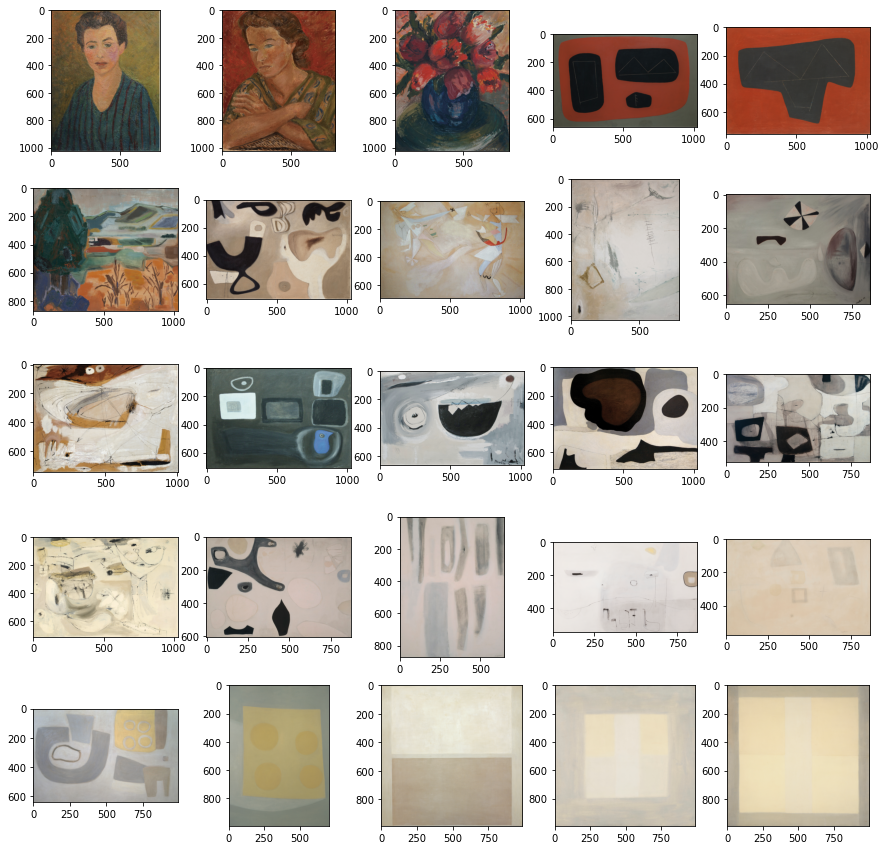

In [170]:
plt.figure(figsize=(15,15)) # specifying the overall grid size
for i in range(25):
    plt.subplot(5,5,i+1)
    img = Image.open('Paintings/' + result_images[i] + '.png')
    plt.imshow(img)
plt.show()

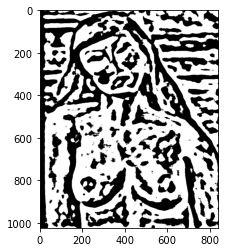

In [211]:
path = (r'C:/Users/Andrew/Documents/GitHub/Content_Based_Image_Retrieval_System/Paintings/')
image = cv2.imread(path + '1947.001.png')
blur = cv2.medianBlur(image, 17)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,51,1.5)


# edge detectors
# gx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=17)
# gy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=17)

# Calculate the magnitude and angle of 2D vectors.
# mag, _ = cv2.cartToPolar(gx, gy)
plt.imshow(th3, cmap='gray');

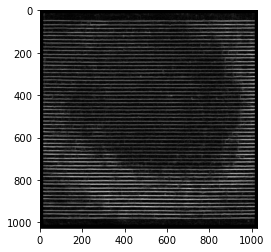

In [110]:
img = cv2.copyMakeBorder(mag, 15, 15, 15, 15,
    cv2.BORDER_CONSTANT, value = 255)

plt.imshow(img, cmap='gray')

In [94]:
moments = cv2.HuMoments(cv2.moments(img)).flatten()
moments

array([ 8.26022937e-11,  9.03084539e-23,  9.98897809e-34,  6.30237426e-34,
       -4.94734380e-67, -3.14556318e-45,  7.27447013e-68])

In [115]:
moments = cv2.HuMoments(cv2.moments(img)).flatten()
moments

array([ 1.66242712e-10,  5.86779949e-23,  2.96016839e-33,  3.47328848e-32,
        3.26212754e-64, -1.24664827e-43,  1.32735582e-64])

In [105]:
# normalize the histogram
test = moments.astype("float")
test /= (test.sum() + 1e-7)

test

array([ 8.25341186e-04,  9.02339186e-16,  9.98073377e-27,  6.29717265e-27,
       -4.94326055e-60, -3.14296701e-38,  7.26846621e-61])

In [112]:
# normalize the histogram
test = moments.astype("float")
test /= (test.sum() + 1e-7)

test

array([ 1.65966804e-03,  5.85806089e-16,  2.95525549e-26,  3.46752397e-25,
        3.25671349e-57, -1.24457925e-36,  1.32515285e-57])

In [108]:
np.log(moments)

C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([ -23.21698367,  -50.75881116,  -75.98641087,  -76.44696673,
                 nan,           nan, -154.59141535])

In [124]:
x = np.log(moments)
x

C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([ -22.51757228,  -51.18997745,  -74.90006191,  -72.43762114,
       -146.18306635,           nan, -147.0822571 ])

In [126]:
np.nan_to_num(x)

array([ -22.51757228,  -51.18997745,  -74.90006191,  -72.43762114,
       -146.18306635,    0.        , -147.0822571 ])